In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_theme()
import networkx as nx
from tqdm import tqdm
import time
import random
%matplotlib widget

In [3]:
Probber = np.array([[0.1,0.4,0.5],
                    [0.3,0.3,0.4],
                    [0.1,0.1,0.8]])

In [4]:
# Calculate the eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(Probber.T)

# Find the left eigenvectors
left_eigenvectors = eigenvectors.T
Rpi = left_eigenvectors[0,:]/sum(left_eigenvectors[0,:])

In [5]:
Rpi

array([0.13513514, 0.17567568, 0.68918919])

# The machinery

In [42]:

a = np.shape(Probber)[0]

def check_win(new_x_cop,new_x_robber):
    """
    Checks if there is a cop win.
    """
    if new_x_cop == new_x_robber:
        # print("COP WIN")
        return True
    return False

def make_move(Pcop,Probber,Xcop,Xrobber):
    """
    Do a timestep, both the cop and the robber will make a move.
    """
    global a
    new_Xcop =np.random.choice(a, p =Pcop[Xcop,:])
    new_Xrobber =np.random.choice(a, p =Probber[Xrobber,:])


    return (new_Xcop,new_Xrobber)


def run_a_bunch(Pcop,Probber,Xcop,Xrobber,N):
    """
    Runs a bunch of simulations with Pcop, Probber. Xcop and Xrobber are the starting positions, N is the amount of runs to bunch.
    """
    bigdata = list()
    bigdata.append({"rounds":1,"caught at":0}) #just to not get zeros
    bigdata.append({"rounds":1,"caught at":1})
    
    if Xcop == None: #set the xcop randomly if xcop is None.
        print("sss")
        new_Xcop = random.choice([0,1,2])
    else:
        new_Xcop = Xcop
        
    if Xrobber == None:
        new_Xrobber = random.choice([0,1,2])
    else:
        new_Xrobber = Xrobber
    
    roundcount = 0
    
    for i in range(N):
        
        new_Xcop, new_Xrobber = make_move(Pcop,Probber,new_Xcop,new_Xrobber)

        #Put the following below the if statment if we DO want to include an initial catch.
        roundcount += 1
        
        if check_win(new_Xcop,new_Xrobber):
            # print(f"rounds taken: {roundcount}, caught at: {new_Xcop,new_Xrobber}")
            data = {"rounds":roundcount,"caught at":new_Xcop}
            roundcount = 0
            bigdata.append(data)
            
            if Xcop == None:
                new_Xcop = random.choice([0,1,2])
            else:
                new_Xcop = Xcop
            if Xrobber == None:
                new_Xrobber = random.choice([0,1,2])
            else:
                new_Xrobber = Xrobber
            # return None



    return pd.DataFrame(bigdata)


# Strategy 2, cop stays at argmax
Cop stays at house 3

In [48]:
%%time
Pcop = np.array([[0,0,1],
                 [0,0,1],
                 [0,0,1]])
#The cop stays at location 3.

df2 = run_a_bunch(Pcop,Probber, 2, 1, 100_000)
# df1

CPU times: user 5.16 s, sys: 39.8 ms, total: 5.2 s
Wall time: 5.14 s


In [49]:
f"The expected catching time is: {df2['rounds'].mean()} rounds"

'The expected catching time is: 2.343284281563408 rounds'

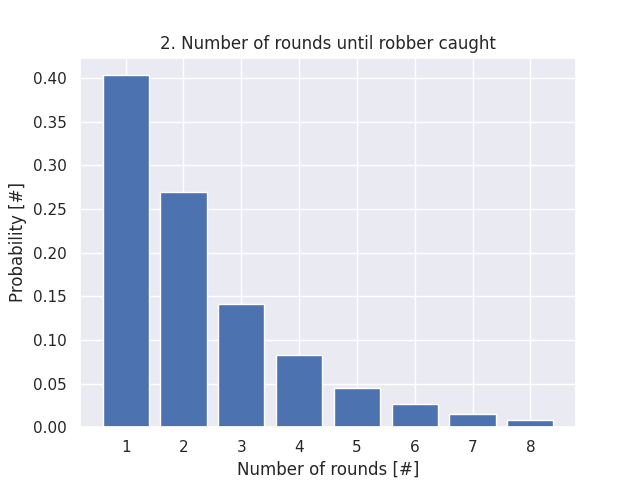

In [50]:
plt.cla()
plt.close()
x, y = np.unique(df2["rounds"], return_counts=True)
y = y/sum(y)


# plt.hist(df1["rounds"],density=True, bins = [i for i in range(1,df1["rounds"].max()-9,1)])
plt.bar(x[:-8],y[:-8])

plt.xlabel("Number of rounds [#]")
plt.ylabel("Probability [#]")
plt.title("2. Number of rounds until robber caught")
plt.savefig("simulationimages/2numberofrounds.svg")
plt.savefig("simulationimages/2numberofrounds.png")
plt.show()

In [51]:
f'Probability of catching in 5 days =  {sum(y[0:4])}'

'Probability of catching in 5 days =  0.8963820414284375'

In [281]:
round_heatmap2 = np.zeros([3,3])
location_heatmap2 = np.zeros([3,3])

for i in range(3):
    for j in range(3):
        this_df  = run_a_bunch(Pcop,Probber, i, j, 100_000)
        rounds = this_df['rounds'].mean()
        location = this_df['caught at'].mode()[0]
        
        #set the heatmaps
        location_heatmap2[i,j] = location + 1
        round_heatmap2[i,j] = rounds
        # list_of_dfs.append( {"copstart:":i,"robberstart":j,"rounds":rounds,"location":location})
        

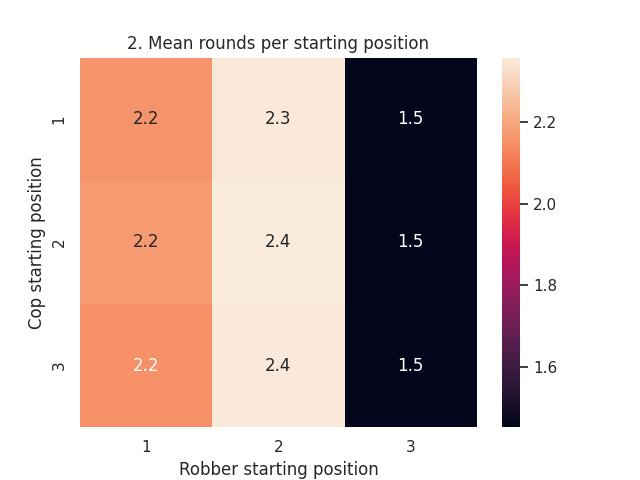

In [282]:


plt.cla()
plt.close()
# sns.heatmap(round_heatmap2, annot=True)

ax = sns.heatmap(round_heatmap2,annot=True)

# Modify the tick labels of the x-axis and y-axis
ax.set_xticklabels([1, 2, 3])
ax.set_yticklabels([1, 2, 3])

plt.xlabel("Robber starting position")
plt.ylabel("Cop starting position")
plt.title("2. Mean rounds per starting position")

plt.savefig("simulationimages/2rounds.svg")
plt.savefig("simulationimages/2rounds.png")
plt.show()


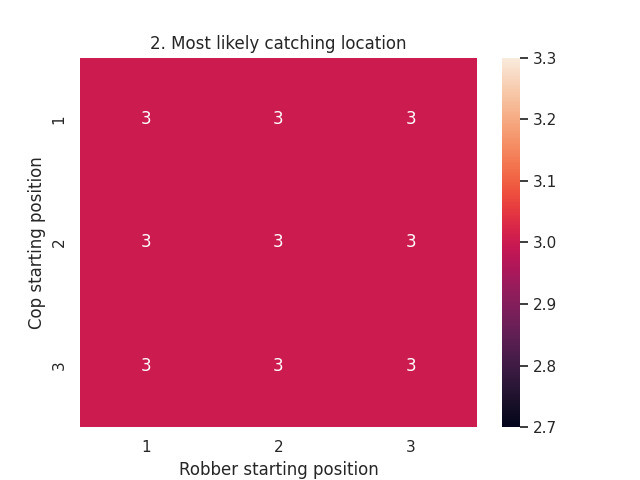

In [283]:
plt.cla()
plt.close()
# Create a seaborn heatmap
ax = sns.heatmap(location_heatmap2,annot=True)

# Modify the tick labels of the x-axis and y-axis
ax.set_xticklabels([1, 2, 3])
ax.set_yticklabels([1, 2, 3])
# sns.heatmap(, annot=True)
plt.xlabel("Robber starting position")
plt.ylabel("Cop starting position")
plt.title("2. Most likely catching location")

plt.savefig("simulationimages/2location.svg")
plt.savefig("simulationimages/2location.png")
plt.show()


# Strategy 1: Uniform cop chain

In [14]:

# Generate a 3x3 array with all entries being 1/3
Pcop = np.full((3, 3), 1/3)
#The cop is randomly sampling

df1 = run_a_bunch(Pcop,Probber,  None, 0, 400_000)
# df

sss


In [15]:
f"The expected catching time is: {df1['rounds'].mean():0.6f} rounds"

'The expected catching time is: 3.005764 rounds'

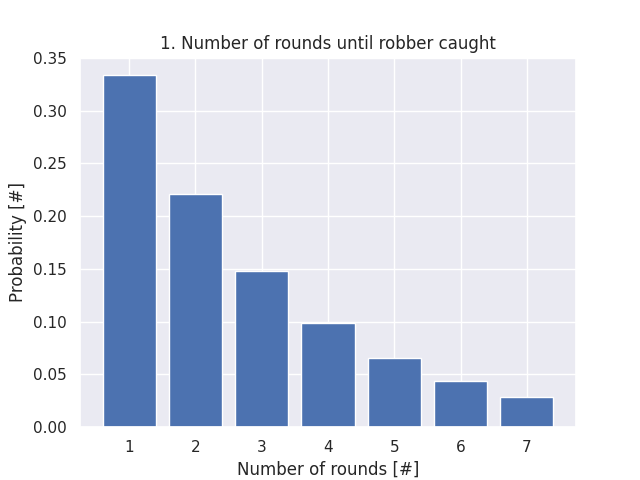

In [17]:
plt.cla()
plt.close()
x, y = np.unique(df1["rounds"], return_counts=True)
y = y/sum(y)


# plt.hist(df1["rounds"],density=True, bins = [i for i in range(1,df1["rounds"].max()-9,1)])
plt.bar(x[:7],y[:7])
plt.xlabel("Number of rounds [#]")
plt.ylabel("Probability [#]")
plt.title("1. Number of rounds until robber caught")


plt.savefig("simulationimages/1numberofrounds.svg")
plt.savefig("simulationimages/1numberofrounds.png")
plt.show()

In [18]:
f'Probability of catching in 7 days =  {sum(y[0:7]):0.3f}'

'Probability of catching in 7 days =  0.940'

In [19]:
f'Probability of catching in 4 days =  {sum(y[0:4]):0.3f}'

'Probability of catching in 4 days =  0.802'

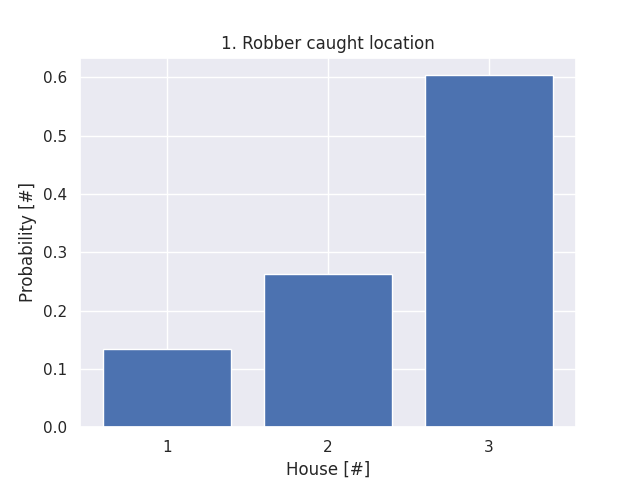

In [289]:
plt.cla()
plt.close()
plt.bar(['1','2','3'],np.histogram(df1["caught at"],bins=3)[0]/np.histogram(df1["caught at"],bins=3)[0].sum())
plt.xlabel("House [#]")
plt.ylabel("Probability [#]")
plt.title("1. Robber caught location")

plt.savefig("simulationimages/1caughtlocation.svg")
plt.savefig("simulationimages/1caughtlocation.png")
plt.show()

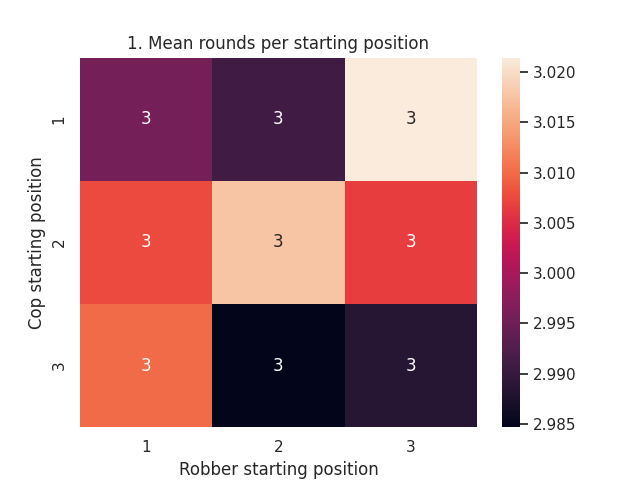

In [290]:
round_heatmap1 = np.zeros([3,3])
location_heatmap1 = np.zeros([3,3])

for i in range(3):
    for j in range(3):
        this_df  = run_a_bunch(Pcop,Probber, i, j, 100000)
        rounds = this_df['rounds'].mean()
        location = this_df['caught at'].mode()[0]
        
        #set the heatmaps
        location_heatmap1[i,j] = location + 1
        round_heatmap1[i,j] = rounds
        # list_of_dfs.append( {"copstart:":i,"robberstart":j,"rounds":rounds,"location":location})
        

plt.cla()
plt.close()
# sns.heatmap(round_heatmap1, annot=True)

ax = sns.heatmap(round_heatmap1,annot=True)

# Modify the tick labels of the x-axis and y-axis
ax.set_xticklabels([1, 2, 3])
ax.set_yticklabels([1, 2, 3])


plt.xlabel("Robber starting position")
plt.ylabel("Cop starting position")
plt.title("1. Mean rounds per starting position")

plt.savefig("simulationimages/1rounds.svg")
plt.savefig("simulationimages/1rounds.png")
plt.show()

plt.cla()
plt.close()
# sns.heatmap(round_heatmap2, annot=True)


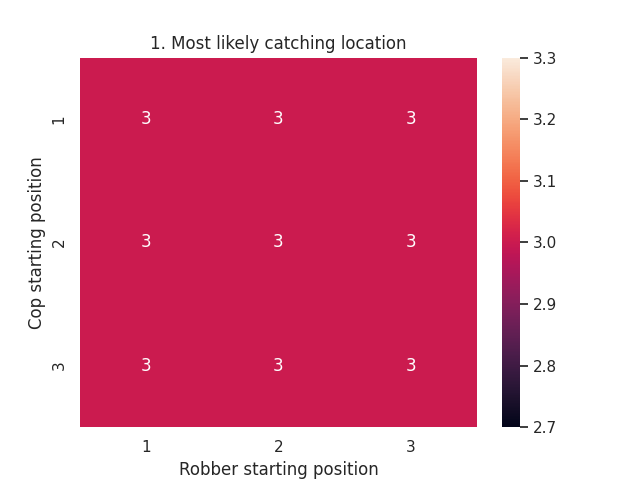

In [291]:
plt.cla()
plt.close()
ax = sns.heatmap(location_heatmap1,annot=True)

# Modify the tick labels of the x-axis and y-axis
ax.set_xticklabels([1, 2, 3])
ax.set_yticklabels([1, 2, 3])
# sns.heatmap(location_heatmap1, annot=True)
plt.xlabel("Robber starting position")
plt.ylabel("Cop starting position")
plt.title("1. Most likely catching location")
plt.savefig("simulationimages/1location.svg")
plt.savefig("simulationimages/1location.png")
plt.show()



# Strategy 4 (5 in mathematica and the rapport): Pcop = Probber

In [79]:
%%time
Pcop = Probber

df4 = run_a_bunch(Pcop,Probber, 1, 0, 200_000)
# df

CPU times: user 11.4 s, sys: 834 ms, total: 12.3 s
Wall time: 11.4 s


In [80]:
f"The expected catching time is: {df4['rounds'].mean()} rounds"

'The expected catching time is: 2.6247621297426407 rounds'

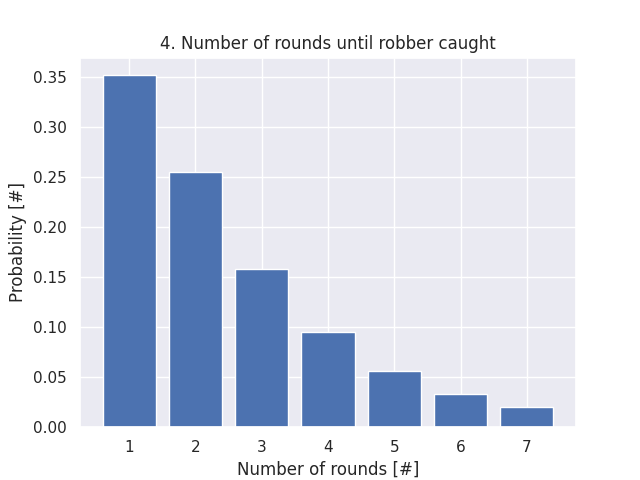

In [81]:
plt.cla()
plt.close()
x, y = np.unique(df4["rounds"], return_counts=True)
y = y/sum(y)


# plt.hist(df1["rounds"],density=True, bins = [i for i in range(1,df1["rounds"].max()-9,1)])
plt.bar(x[:7],y[:7])
plt.xlabel("Number of rounds [#]")
plt.ylabel("Probability [#]")
plt.title("4. Number of rounds until robber caught")

plt.savefig("simulationimages/4numberofrounds.svg")
plt.savefig("simulationimages/4numberofrounds.png")
plt.show()

In [82]:
f'Probability of catching in 7 days =  {sum(y[0:4]):0.3f}'

'Probability of catching in 7 days =  0.860'

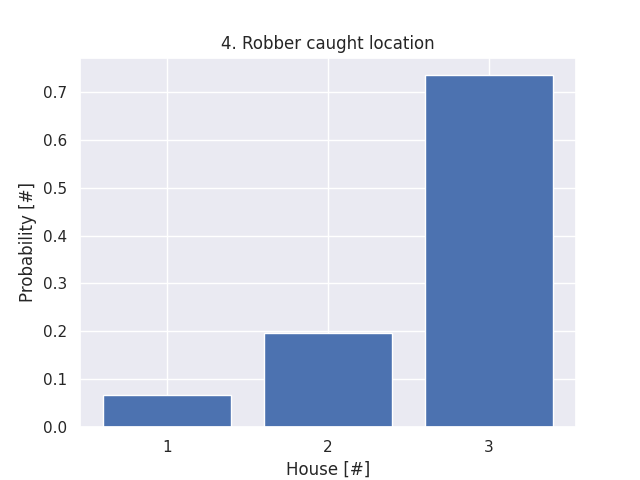

In [296]:
plt.cla()
plt.close()
plt.bar(['1','2','3'],np.histogram(df4["caught at"],bins=3)[0]/np.histogram(df4["caught at"],bins=3)[0].sum())
plt.xlabel("House [#]")
plt.ylabel("Probability [#]")
plt.title("4. Robber caught location")

plt.savefig("simulationimages/4caughtlocation.svg")
plt.savefig("simulationimages/4caughtlocation.png")
plt.show()

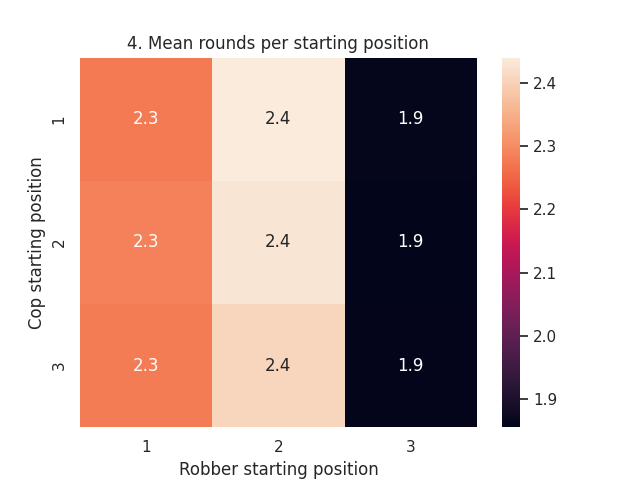

In [308]:
round_heatmap4 = np.zeros([3,3])
location_heatmap4 = np.zeros([3,3])

for i in range(3):
    for j in range(3):
        this_df  = run_a_bunch(Pcop,Probber, i, j, 100_000)
        rounds = this_df['rounds'].mean()
        location = this_df['caught at'].mode()[0]
        
        #set the heatmaps
        location_heatmap4[i,j] = location + 1
        round_heatmap4[i,j] = rounds
        # list_of_dfs.append( {"copstart:":i,"robberstart":j,"rounds":rounds,"location":location})
        

plt.cla()
plt.close()
ax = sns.heatmap(round_heatmap4,annot=True)

# Modify the tick labels of the x-axis and y-axis
ax.set_xticklabels([1, 2, 3])
ax.set_yticklabels([1, 2, 3])
# sns.heatmap(round_heatmap4, annot=True)
plt.xlabel("Robber starting position")
plt.ylabel("Cop starting position")
plt.title("4. Mean rounds per starting position")


plt.savefig("simulationimages/4rounds.svg")
plt.savefig("simulationimages/4rounds.png")
plt.show()


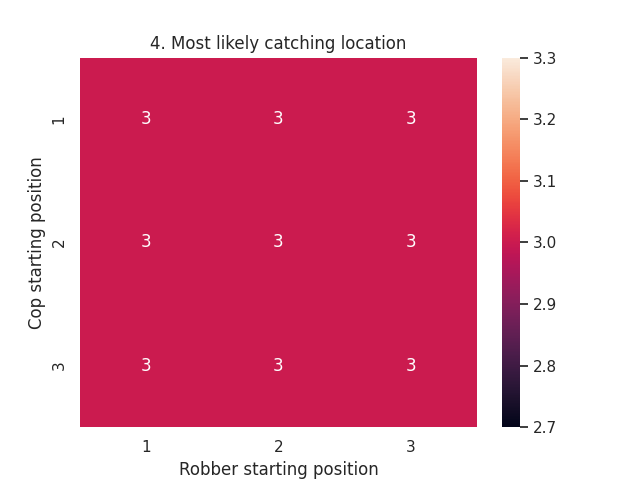

In [298]:
plt.cla()
plt.close()
# sns.heatmap(location_heatmap4, annot=True)

ax = sns.heatmap(location_heatmap4,annot=True)

# Modify the tick labels of the x-axis and y-axis
ax.set_xticklabels([1, 2, 3])
ax.set_yticklabels([1, 2, 3])

plt.xlabel("Robber starting position")
plt.ylabel("Cop starting position")
plt.title("4. Most likely catching location")


plt.savefig("simulationimages/4location.svg")
plt.savefig("simulationimages/4location.png")
plt.show()


# Strategy 3 Pcop = Rpi
The cop moves according to the stationary distribution of the robber

In [52]:
Rpi

array([0.13513514, 0.17567568, 0.68918919])

In [71]:
%%time
Pcop = np.vstack((Rpi,Rpi,Rpi))

df3 = run_a_bunch(Pcop,Probber, None, 1, 200_000)
# df

sss
CPU times: user 10.7 s, sys: 1.17 s, total: 11.9 s
Wall time: 10.7 s


In [72]:
f"The expected catching time is: {df3['rounds'].mean()} rounds"

'The expected catching time is: 2.4222733603827287 rounds'

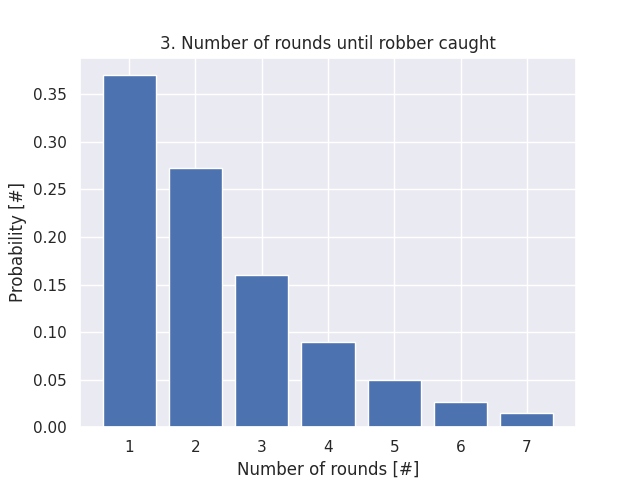

In [73]:
plt.cla()
plt.close()
x, y = np.unique(df3["rounds"], return_counts=True)
y = y/sum(y)


# plt.hist(df1["rounds"],density=True, bins = [i for i in range(1,df1["rounds"].max()-9,1)])
plt.bar(x[:7],y[:7])
plt.xlabel("Number of rounds [#]")
plt.ylabel("Probability [#]")
plt.title("3. Number of rounds until robber caught")
plt.savefig("simulationimages/3numberofrounds.svg")
plt.savefig("simulationimages/3numberofrounds.png")
plt.show()

In [74]:
f'Probability of catching in 5 days =  {sum(y[0:4]):0.3f}'

'Probability of catching in 5 days =  0.892'

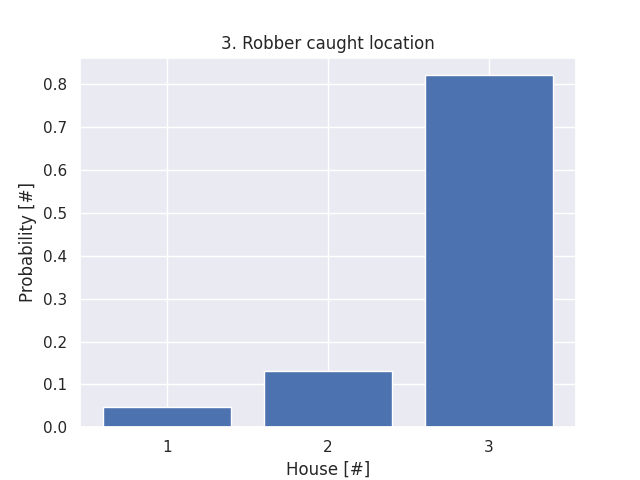

In [304]:
plt.cla()
plt.close()
plt.bar(['1','2','3'],np.histogram(df3["caught at"],bins=3)[0]/np.histogram(df3["caught at"],bins=3)[0].sum())
plt.xlabel("House [#]")
plt.ylabel("Probability [#]")
plt.title("3. Robber caught location")
plt.savefig("simulationimages/3caughtlocation.svg")
plt.savefig("simulationimages/3caughtlocation.png")
plt.show()

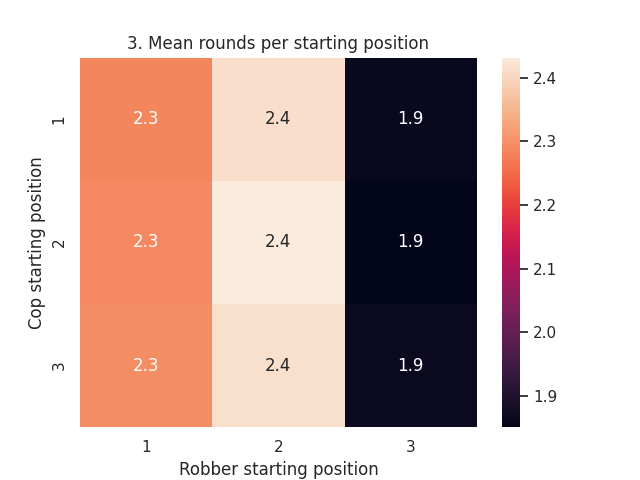

In [309]:
round_heatmap3 = np.zeros([3,3])
location_heatmap3 = np.zeros([3,3])

for i in range(3):
    for j in range(3):
        this_df  = run_a_bunch(Pcop,Probber, i, j,  100000)
        rounds = this_df['rounds'].mean()
        location = this_df['caught at'].mode()[0]
        
        #set the heatmaps
        location_heatmap3[i,j] = location + 1
        round_heatmap3[i,j] = rounds
        # list_of_dfs.append( {"copstart:":i,"robberstart":j,"rounds":rounds,"location":location})
        

plt.cla()
plt.close()
# sns.heatmap(round_heatmap3, annot=True)

ax = sns.heatmap(round_heatmap3,annot=True)

# Modify the tick labels of the x-axis and y-axis
ax.set_xticklabels([1, 2, 3])
ax.set_yticklabels([1, 2, 3])

plt.xlabel("Robber starting position")
plt.ylabel("Cop starting position")
plt.title("3. Mean rounds per starting position")

plt.savefig("simulationimages/3rounds.svg")
plt.savefig("simulationimages/3rounds.png")
plt.show()



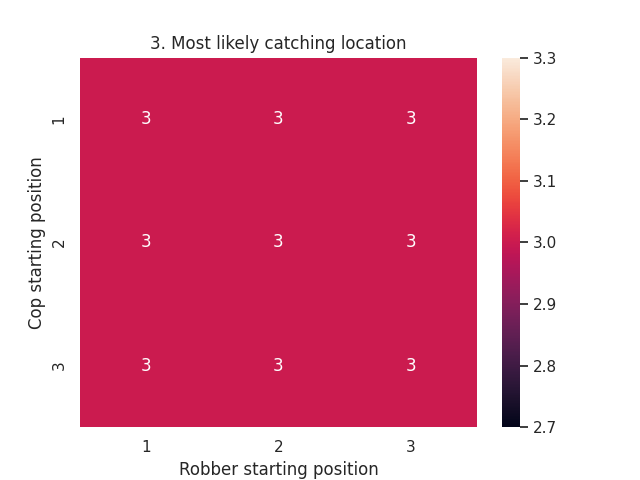

In [310]:
plt.cla()
plt.close()
# sns.heatmap(location_heatmap3, annot=True)
ax = sns.heatmap(location_heatmap3,annot=True)

# Modify the tick labels of the x-axis and y-axis
ax.set_xticklabels([1, 2, 3])
ax.set_yticklabels([1, 2, 3])

plt.xlabel("Robber starting position")
plt.ylabel("Cop starting position")
plt.title("3. Most likely catching location")
plt.savefig("simulationimages/3location.svg")
plt.savefig("simulationimages/3location.png")
plt.show()


# Comparison of strategies

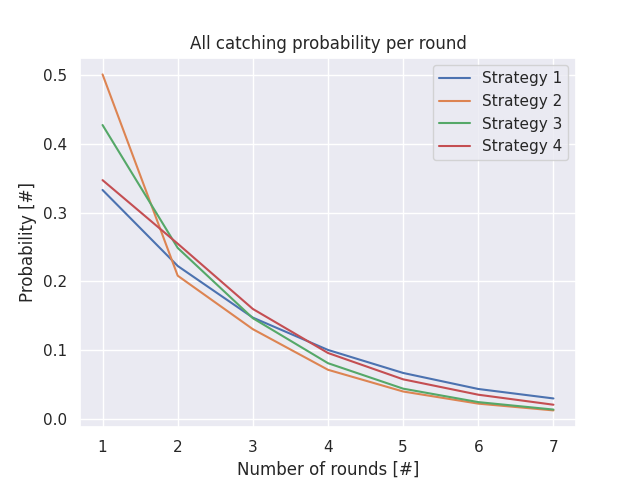

In [317]:
plt.cla()
plt.close()
x, y1 = np.unique(df1["rounds"], return_counts=True)
x, y2 = np.unique(df2["rounds"], return_counts=True)

x, y3 = np.unique(df3["rounds"], return_counts=True)

x, y4 = np.unique(df4["rounds"], return_counts=True)

y1 = y1/sum(y1)
y2 = y2/sum(y2)
y3 = y3/sum(y3)
y4 = y4/sum(y4)
# plt.hist(df1["rounds"],density=True, bins = [i for i in range(1,df1["rounds"].max()-9,1)])
plt.plot(x[:7],y1[:7],label="Strategy 1")
plt.plot(x[:7],y2[:7],label="Strategy 2")
plt.plot(x[:7],y3[:7],label="Strategy 3")
plt.plot(x[:7],y4[:7],label="Strategy 4")
plt.xlabel("Number of rounds [#]")
plt.ylabel("Probability [#]")
plt.title("All catching probability per round")
plt.savefig("simulationimages/ALLcatchingRounds.svg")
plt.savefig("simulationimages/ALLcatchingRounds.png")
plt.legend()
plt.show()

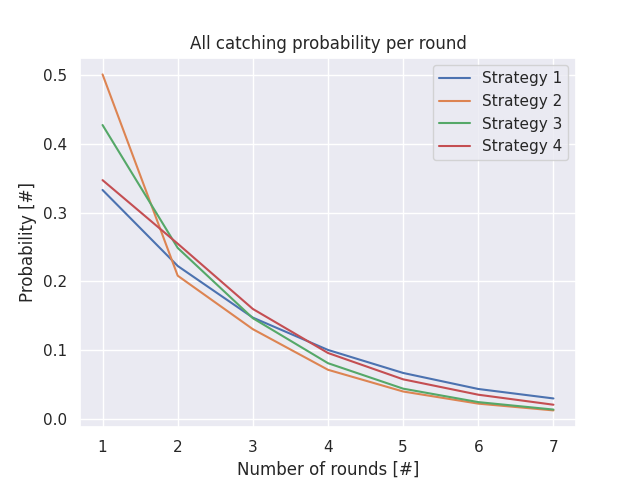

In [318]:
plt.cla()
plt.close()
x, y1 = np.unique(df1["rounds"], return_counts=True)
x, y2 = np.unique(df2["rounds"], return_counts=True)

x, y3 = np.unique(df3["rounds"], return_counts=True)

x, y4 = np.unique(df4["rounds"], return_counts=True)

y1 = y1/sum(y1)
y2 = y2/sum(y2)
y3 = y3/sum(y3)
y4 = y4/sum(y4)
# plt.hist(df1["rounds"],density=True, bins = [i for i in range(1,df1["rounds"].max()-9,1)])
plt.plot(x[:7],y1[:7],label="Strategy 1")
plt.plot(x[:7],y2[:7],label="Strategy 2")
plt.plot(x[:7],y3[:7],label="Strategy 3")
plt.plot(x[:7],y4[:7],label="Strategy 4")
plt.xlabel("Number of rounds [#]")
plt.ylabel("Probability [#]")
plt.title("All catching probability per round")
plt.savefig("simulationimages/ALLcatchingRounds.svg")
plt.savefig("simulationimages/ALLcatchingRounds.png")
plt.legend()
plt.show()

In [319]:
y1

array([3.32818382e-01, 2.22233888e-01, 1.47076028e-01, 1.00025498e-01,
       6.65336793e-02, 4.32108950e-02, 2.94422030e-02, 2.03380679e-02,
       1.30187632e-02, 8.63917928e-03, 5.69945855e-03, 3.53966373e-03,
       2.26478485e-03, 1.96481334e-03, 1.12489314e-03, 6.74935881e-04,
       4.04961529e-04, 3.44967228e-04, 1.64984326e-04, 1.64984326e-04,
       1.04990026e-04, 4.49957254e-05, 2.99971503e-05, 5.99943005e-05,
       2.99971503e-05, 2.99971503e-05, 1.49985751e-05])

In [320]:
y1[0:1]

array([0.33281838])

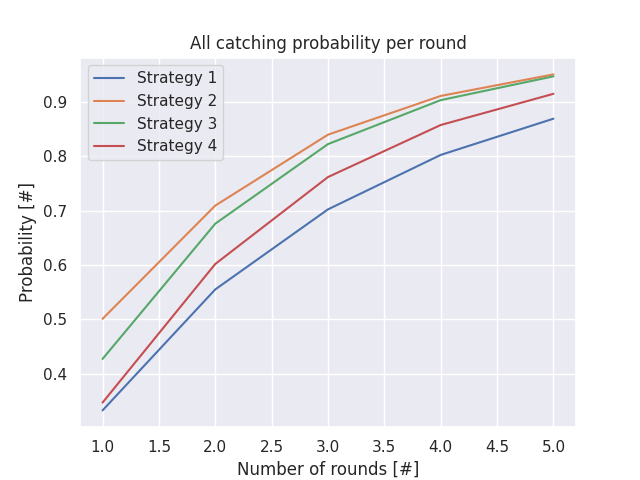

In [321]:
plt.cla()
plt.close()
x, y1 = np.unique(df1["rounds"], return_counts=True)
x, y2 = np.unique(df2["rounds"], return_counts=True)

x, y3 = np.unique(df3["rounds"], return_counts=True)

x, y4 = np.unique(df4["rounds"], return_counts=True)

y1 = y1/sum(y1)
CDFy1= [sum(y1[0:i]) for i in range(1,9,1)]
y2 = y2/sum(y2)
CDFy2= [sum(y2[0:i]) for i in range(1,9,1)]

y3 = y3/sum(y3)
CDFy3= [sum(y3[0:i]) for i in range(1,9,1)]

y4 = y4/sum(y4)
CDFy4= [sum(y4[0:i]) for i in range(1,9,1)]

# plt.hist(df1["rounds"],density=True, bins = [i for i in range(1,df1["rounds"].max()-9,1)])
plt.plot(x[:5],CDFy1[:5],label="Strategy 1")
plt.plot(x[:5],CDFy2[:5],label="Strategy 2")
plt.plot(x[:5],CDFy3[:5],label="Strategy 3")
plt.plot(x[:5],CDFy4[:5],label="Strategy 4")
plt.xlabel("Number of rounds [#]")
plt.ylabel("Probability [#]")
plt.title("All catching probability per round")
plt.savefig("simulationimages/ALLcatchingRoundsCDF.svg")
plt.savefig("simulationimages/ALLcatchingRoundsCDF.png")
plt.legend()
plt.show()

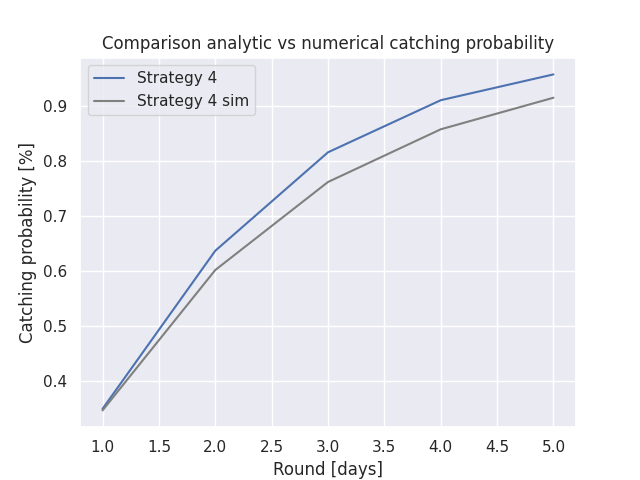

In [331]:
# Read the XLS file into a DataFrame
df_math = pd.read_excel('mathematica.xlsx')
plt.cla()
plt.close()
# plt.plot(x[:5],df_math.iloc[:,0],label="Strategy 1")
# plt.plot(x[:5],df_math.iloc[:,1],label="Strategy 2")
# plt.plot(x[:5],df_math.iloc[:,2],label="Strategy 3")
plt.plot(x[:5],df_math.iloc[:,3],label="Strategy 4")

# plt.plot(x[:5],CDFy1[:5],label="Strategy 1 sim",c="grey")
# plt.plot(x[:5],CDFy2[:5],label="Strategy 2 sim",c="grey")
# plt.plot(x[:5],CDFy3[:5],label="Strategy 3 sim",c="grey")
plt.plot(x[:5],CDFy4[:5],label="Strategy 4 sim",c="grey")
plt.title("Comparison analytic vs numerical catching probability")
plt.xlabel("Round [days]")
plt.ylabel("Catching probability [%]")

plt.legend()
plt.savefig("simulationimages/comparison4.png")
plt.savefig("simulationimages/comparison4.pdf")

plt.show()

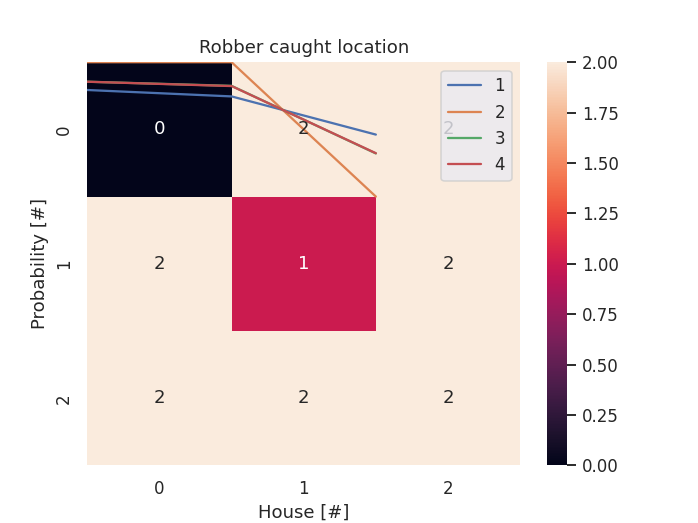

In [69]:
y1 =np.histogram(df1["caught at"],bins=3)[0]/np.histogram(df1["caught at"],bins=3)[0].sum()
y2 =np.histogram(df2["caught at"],bins=3)[0]/np.histogram(df2["caught at"],bins=3)[0].sum()
y3 =np.histogram(df3["caught at"],bins=3)[0]/np.histogram(df3["caught at"],bins=3)[0].sum()
y4 =np.histogram(df4["caught at"],bins=3)[0]/np.histogram(df4["caught at"],bins=3)[0].sum()

plt.cla()
plt.close()
plt.plot(['1','2','3'],y1,label="1")
plt.plot(['1','2','3'],y2, label="2")
plt.plot(['1','2','3'],y3, label="3")
plt.plot(['1','2','3'],y4, label="4")

plt.xlabel("House [#]")
plt.ylabel("Probability [#]")
plt.legend()
plt.title("Robber caught location")

plt.savefig("simulationimages/ALLrobbercaught.svg")
plt.savefig("simulationimages/ALLrobbercaught.png")
plt.show()

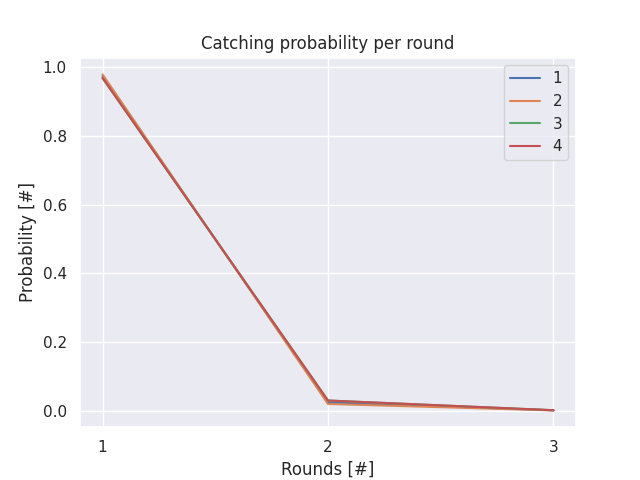

In [70]:
y1 =np.histogram(df1["rounds"],bins=3)[0]/np.histogram(df1["rounds"],bins=3)[0].sum()
y2 =np.histogram(df2["rounds"],bins=3)[0]/np.histogram(df2["rounds"],bins=3)[0].sum()
y3 =np.histogram(df3["rounds"],bins=3)[0]/np.histogram(df3["rounds"],bins=3)[0].sum()
y4 =np.histogram(df4["rounds"],bins=3)[0]/np.histogram(df4["rounds"],bins=3)[0].sum()

plt.cla()
plt.close()
AA = ['1','2','3']
plt.plot(AA,y1,label="1")
plt.plot(AA,y2, label="2")
plt.plot(AA,y3, label="3")
plt.plot(AA,y4, label="4")

plt.xlabel("Rounds [#]")
plt.ylabel("Probability [#]")
plt.legend()
plt.title("Catching probability per round")

plt.savefig("simulationimages/ALLcatchinprob.svg")
plt.savefig("simulationimages/ALLcatchinprob.png")
plt.show()

In [71]:
y1 

array([9.74648729e-01, 2.43946188e-02, 9.56651719e-04])

In [72]:
unique, counts = np.unique(df3["rounds"], return_counts=True)
dict1= dict(zip(unique, counts))

In [73]:
dict1

{1: 20210,
 2: 18700,
 3: 10047,
 4: 5436,
 5: 3049,
 6: 1642,
 7: 862,
 8: 480,
 9: 265,
 10: 127,
 11: 66,
 12: 37,
 13: 20,
 14: 13,
 15: 11,
 16: 1,
 17: 5}